This notebook contains material taught in Keith McCormick's _Machine Learning & AI Foundations : Linear Regression_ course. The course was taught using IBM's SPSS statistical software. I implemented course lessons in Python, as core concepts are generally tool-agnostic, and I wanted to reaffirm my understanding of these concepts. Furthermore, the course syllabus served as a guide as to what other topics I would explore outside of the course.

# Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors

In [2]:
# Source : https://archive.ics.uci.edu/ml/index.php
# contains over 500 datsets for machine learning purposes

# run conda-forge for to retrieve dependencies
first_file = pd.read_spss('Exercise Files/Resources/Auto MPG Modified.sav')

In [3]:
first_file.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA,ford torino


__Goal__ : Let's predict mpg using the other variables (like weight)(label the colors with the origin variable)

__How__ : Let's draw a scatter plot

Different Types of Data:
    - Scaled
    - Nominal
    - Ordinal

__Regression__ : the search for relationships between observation's independent (inputs, predictors) and dependent (outputs, responses) variables. Used :
 - to show how several variables are related and
 - when wanting to forecast a response.

<img src='CalculatingSlopeAndIntercept.PNG'>

The denominator is read as the sum of X squared, minus the mean of X multiplied by the sum of X. The most efficient way of calculating the sum of X squared in numpy is to calculate the dot product.

In [4]:
denominator = first_file['weight'].dot(first_file['weight']) - np.mean(first_file['weight']) * np.sum(first_file['weight'])

In [5]:
denominator

284704973.23869324

<img src='LinearRegressionExplanation.PNG'>

<img src='CoefficientOfDetermination.PNG'>

__Simple or single-variate linear regression__ is the simplest case of linear regression with a single independent variable. __Multiple or multivariate linear regression__ is a case of linear regression with two or more independent variables.

__Underfitting__ occurs when a model can’t accurately capture the dependencies among data, usually as a consequence of its own simplicity. It often yields a low 𝑅² with known data and bad generalization capabilities when applied with new data.

__Overfitting__ happens when a model learns both dependencies among data and random fluctuations. In other words, a model learns the existing data too well. Complex models, which have many features or terms, are often prone to overfitting. When applied to known data, such models usually yield high 𝑅². However, they often don’t generalize well and have significantly lower 𝑅² when used with new data

In [6]:
def simpleLinearRegressionPlot(predictors, response, xlabel='', ylabel = '', title='', c=None, s=None):
    
    """
    Creates a scatter plot and draws the line of best fit between the predictor and response variables.
    
    xlabel - the string you want displayed on the x-axis
    
    ylabel - the string you want displayed on the y-axis
    
    title - the string to appear as the title of the scatter plot
    
    c - sequence of colors to group observations
    
    s - the scalar that increase the size of the points on the scatter plot
    """
    
    x = np.array(predictors).reshape((-1,1))
    y = response
    
    # represents the regression model
    # calculates the optimal values of the regression coefficients (best predicted weights)
    model = LinearRegression().fit(x,y)
    
    # returns R^2 value
    coefficient_of_determination = model.score(x,y)
    
    # pass in the dependent variable to get the forecasted response
    y_pred = model.predict(x)
    
    # prints R^2 value
    print('coefficient of determination: ', coefficient_of_determination)

    # prints y-intercept value
    print('intercept: ', model.intercept_)

    # prints the slope
    print('slope: ', model.coef_[0])

    fig, ax = plt.subplots()

    # plots the independent variable, weight, and the dependent variable, mpg
    ax.scatter(predictors, response, c=c, s=s)
    
    # plots line of best-fit
    plt.plot(predictors, y_pred, 'r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

coefficient of determination:  0.6917929800341575
intercept:  46.31736442026565
slope:  -0.00767661006392647


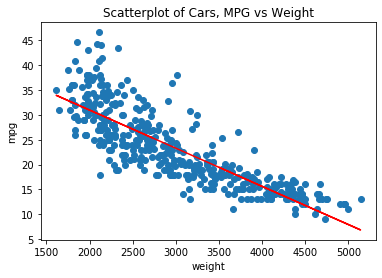

In [7]:
x = first_file['weight']
y = first_file['mpg']
simpleLinearRegressionPlot(x, y, 'weight', 'mpg', 'Scatterplot of Cars, MPG vs Weight')

Source to learn about simple and multiple linear regression : https://realpython.com/linear-regression-in-python/

# Ways to Plot the Scatter Plots to Show the Different Countries 

coefficient of determination:  0.6917929800341575
intercept:  46.31736442026565
slope:  -0.00767661006392647


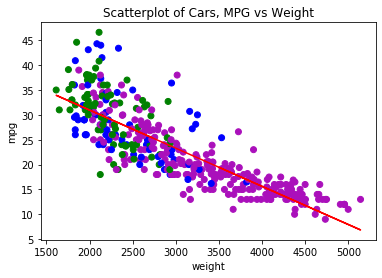

In [8]:
# 1. Use the function created

x = first_file['weight']
y = first_file['mpg']

# colormap
colors = {'USA' : '#AA10BB',
         'Japan' : 'green',
          'Europe' : 'blue'}

simpleLinearRegressionPlot(x, y, 'weight', 'mpg', 'Scatterplot of Cars, MPG vs Weight', first_file['origin'].map(colors))

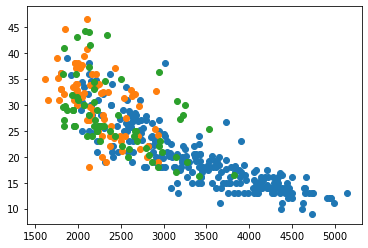

In [9]:
# 2. Use a for-loop

fig, ax = plt.subplots()
for country in first_file['origin'].unique():
    selected_country = first_file[first_file['origin'] == country]
    ax.scatter(selected_country['weight'], selected_country['mpg'])

__Conclusion__ : European and Japanese cars tend to be lights. The heavier cars are American.

# Scatter Plots for Each Country

coefficient of determination:  0.7154511602813305
intercept:  42.99227921626763
slope:  -0.006814161303862454
coefficient of determination:  0.3182160823395399
intercept:  54.2601500605157
slope:  -0.01071907916582082
coefficient of determination:  0.2765081152785299
intercept:  45.375796001306675
slope:  -0.007215106437452277


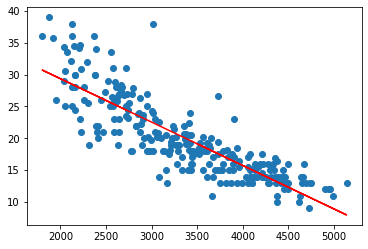

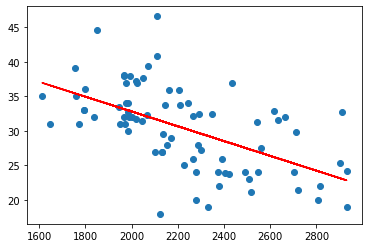

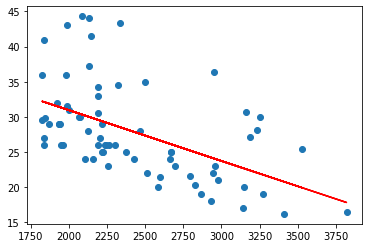

In [10]:
for country in first_file['origin'].unique():
    selected_country = first_file[first_file['origin'] == country]
    simpleLinearRegressionPlot(selected_country['weight'], selected_country['mpg'])

Total variance = variance explained (by regression line) + variance unexplained

r^2 = variance explained / total variance

% variance explained = 100 * (variance explained / total variance)

## Plotting Price vs Horsepower

Let's plot this using a bubble chart, with engine_size adjusting the size of the bubble. Plotly can also be used to create bubble charts with more detailed information (column data can display on hover).

In [11]:
automobile_data = pd.read_spss('Exercise Files/Resources/Auto Imports Scatter.sav')

In [12]:
automobile_data.head(3)

,make,fueltype,aspiration,doors,body,drive,engine_loc,cylinder,engine_size,horsepower,peak_rpm,city_mpg,hwy_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,four,130.0,111.0,5000.0,21.0,27.0,13495.0
1,audi,gas,std,four,sedan,fwd,front,four,109.0,102.0,5500.0,24.0,30.0,13950.0
2,bmw,gas,std,two,sedan,rwd,front,four,108.0,101.0,5800.0,23.0,29.0,16430.0


coefficient of determination:  0.7697315921021158
intercept:  44.68601584431273
slope:  0.004270471846124522


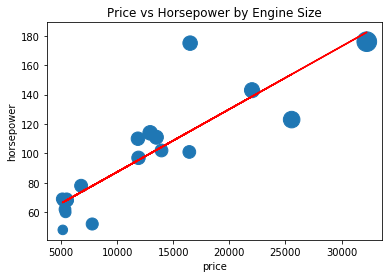

In [13]:
x_col = 'price'
y_col = 'horsepower'
size_col = 'engine_size'
title_formatting = '%s vs %s by %s' % (x_col.capitalize(), y_col.capitalize(), 'Engine Size')

simpleLinearRegressionPlot(automobile_data[x_col], 
                           automobile_data[y_col], 
                           xlabel=x_col, 
                           ylabel=y_col, 
                           title = title_formatting, 
                           s=automobile_data[size_col]*1.5)

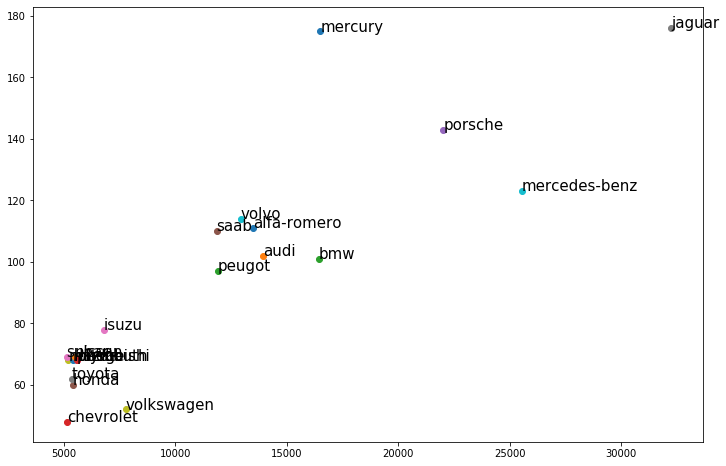

In [14]:
# 2. Use a for-loop

fig, ax = plt.subplots(figsize=(12,8))
for make in automobile_data['make'].unique():
    selected_country = automobile_data[automobile_data['make'] == make]
    ax.scatter(selected_country[x_col], selected_country[y_col])
    text = ax.annotate(make, (selected_country[x_col], selected_country[y_col]))
    text.set_fontsize(15)

In [ ]:
__To be continued__

In [15]:
# bank dataset where employees sued regarding fairness and pay
mw_bank = pd.read_spss('Exercise Files/Resources/Case Study Data/MWBank.sav')

In [16]:
mw_bank.head()

,id,salbeg,sex,time,age,salnow,edlevel,work,jobcat,minority
0,697.0,16992.0,Males,85.0,43.0,27700.0,20.0,11.17,Technical,White
1,943.0,6300.0,Females,90.0,29.0,15120.0,16.0,0.58,College Trainee,White
2,1030.0,7800.0,Females,65.0,30.0,13764.0,16.0,6.58,College Trainee,White
3,777.0,9492.0,Males,78.0,38.0,15480.0,15.0,14.67,Exempt Employee,White
4,950.0,21000.0,Males,83.0,49.0,26700.0,16.0,21.50,Technical,White


R^2
Slope
Intercept

__Next Up__ : Multiple Linear Regression and Quadratic

# Multiple Linear Regression

In [51]:
# two observations did not have a values for sex, and were removed from the regression analysis
mw_bank_refined = mw_bank[mw_bank['sex'].notna()]

In [57]:
# dependent variables
beginning_salary_list = np.array(mw_bank_refined['salbeg']).reshape((-1,1))

# two independent variables
education_level_list = mw_bank_refined['edlevel'].tolist()
sex_list = mw_bank_refined['sex'].apply(lambda gender : 0 if gender == "Males" else 1).tolist()

# there will be two slopes that appear in the coefficients section
# the first slope will be education_level_list and the second level will be the sex
combined_list = [list(a) for a in zip(education_level_list, sex_list)]
combined_array = np.array(combined_list)

In [58]:
model = LinearRegression().fit(combined_array, beginning_salary_list)

In [62]:
r_sq = model.score(combined_array, beginning_salary_list)
print('coefficient of determination: ', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination:  0.46312905699604434
intercept: [-433.30598847]
slope: [[  592.77382354 -1655.90830381]]


In [63]:
y_pred = model.predict(combined_array)

Conclusion : There was evidence there was bias in pay

## Assumptions of Multiple Linear Regression with OLS

__Multiple Linear Regression__: when we have one dependent variable but multiple independent variables

<img src='SpecificationErrors.png'>

Regression Assumptions
 - Residuals have a mean of zero (after running regression model)
 - Normality of errors (independent variables don't necessarily have to be normally distributed)
 - Residuals are not autocorrelated (Durbin-Watson, usually associated with time series data)
 - Need linear relationships
 - need more data than variables
 - No _excessive_ multicollinearity

Challenges of Multiple Regression (that didn't arise from simple linear regression)
 - Visual Examination becomes more difficult (can't really see all variables in a single scatter plot)
 - multicollinearity (when independent variables are correlated with each other)
 - Interactions
 - Attributing importance to each variable
 - Juggling multiple problems at once (several variables have outliers)